## CA 1, LLMs Spring 2024

- **Name:** Majid Faridfar
- **Student ID:** 810199569

---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [14]:
# Run this cell once

!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

Move the content of model file into a folder on Google Drive to have an easier access for the future uses.

In [15]:
# Run this cell once

!mv "/content/glove.6B.zip" "/content/drive/MyDrive/LLM/CA1/"
!mv "/content/glove.6B.50d.txt" "/content/drive/MyDrive/LLM/CA1/"
!mv "/content/glove.6B.100d.txt" "/content/drive/MyDrive/LLM/CA1/"
!mv "/content/glove.6B.200d.txt" "/content/drive/MyDrive/LLM/CA1/"
!mv "/content/glove.6B.300d.txt" "/content/drive/MyDrive/LLM/CA1/"

To use each file, we should have the exact path, so we define the following variable.

In [16]:
folder_path = "/content/drive/MyDrive/LLM/CA1/"

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [17]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = folder_path + 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [24]:
## WRITE YOUR CODE HERE!

words = ['computer', 'football', 'ocean', 'music', 'artificial']

for word in words:
    print("5 most similar words to '" + word + "' among GloVe word embeddings:")

    for similar_word, similarity_score in model.most_similar(word, topn=5):
        print(" - " + similar_word + " (", end='')
        print(f"{similarity_score * 100:.2f} %)")

    print()

5 most similar words to 'computer' among GloVe word embeddings:
 - computers (83.58 %)
 - software (78.28 %)
 - technology (69.08 %)
 - pc (66.48 %)
 - systems (65.84 %)

5 most similar words to 'football' among GloVe word embeddings:
 - soccer (81.05 %)
 - basketball (78.96 %)
 - league (71.67 %)
 - baseball (70.23 %)
 - rugby (70.07 %)

5 most similar words to 'ocean' among GloVe word embeddings:
 - sea (72.77 %)
 - waters (72.42 %)
 - coast (69.73 %)
 - atlantic (69.18 %)
 - seas (68.12 %)

5 most similar words to 'music' among GloVe word embeddings:
 - musical (73.39 %)
 - songs (72.54 %)
 - pop (69.06 %)
 - musicians (68.77 %)
 - recording (68.49 %)

5 most similar words to 'artificial' among GloVe word embeddings:
 - natural (50.51 %)
 - insemination (49.72 %)
 - man-made (48.53 %)
 - synthetic (47.70 %)
 - creating (47.10 %)



**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [ ]:
## WRITE YOUR CODE HERE!

# king - man + woman = queen

positives = ['king', 'woman']
negatives = ['man']

print(model.most_similar(positive = positives, negative = negatives, topn=1)[0][0])

# grandparents - old + young

positives = ['grandparents', 'young']
negatives = ['old']

print(model.most_similar(positive = positives, negative = negatives, topn=1)[0][0])

# ice - cold

positives = ['ice']
negatives = ['cold']

print(model.most_similar(positive = positives, negative = negatives, topn=1)[0][0])

queen
parents
capades


### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

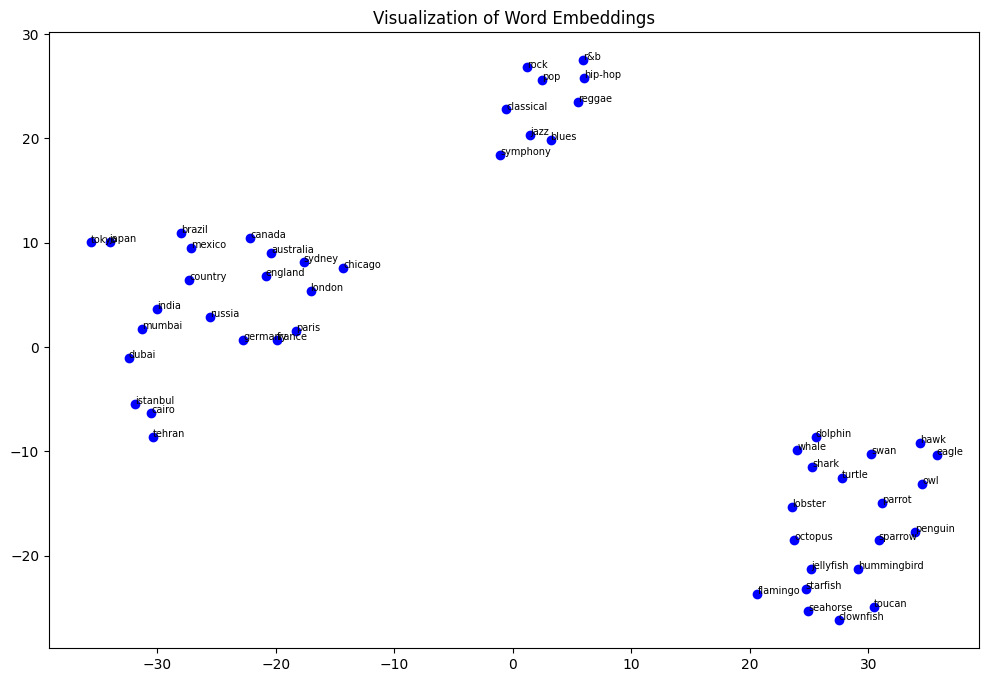

In [25]:
words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]


## WRITE YOUR CODE HERE!

import numpy as np

embeddings_200d = np.array([model[word] for word in words])

from sklearn.manifold import TSNE

## Use 5 for perplexity of TSNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings_200d)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(embeddings_2d):
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x, y, words[i], fontsize=7)

plt.title('Visualization of Word Embeddings')
plt.show()

Analyze the plot and clusters of embeddings:

> As you can see, words that are semantically related, for example, Canada, Dubai, Istanbul, Tehran, etc., have a little distance from each other and are closer to each other. While the words that are more distant from each other in terms of meaning, are located at a greater distance from each other. Like Chicago and Octopus. In general, visually, words are divided into three categories:
>
> - City and country
> - Music style
> - Animals
> 
> This can be also understood by reading the words. So the model has no error in this regard. Even though we have had to reduce the 200d vectors of each word to a 2d vector for display (by t-SNE algorithm), so that it can be displayed on a two-dimensional page, but apparently the words are so different in meaning that there is still a significant distance between them. And the small error in each category (as you can see there is a little distance between two realted words in each group), is due to the reductions of dimensions and can be ignored.

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [26]:
## WRITE YOUR CODE HERE!

words = ['bat', 'charge']

for word in words:
    print("5 most similar words to '" + word + "' among GloVe word embeddings:")

    for similar_word, similarity_score in model.most_similar(word, topn=5):
        print(" - " + similar_word + " (", end='')
        print(f"{similarity_score * 100:.2f} %)")

    print()

5 most similar words to 'bat' among GloVe word embeddings:
 - bats (69.17 %)
 - batting (61.61 %)
 - balls (56.93 %)
 - batted (55.31 %)
 - toss (55.06 %)

5 most similar words to 'charge' among GloVe word embeddings:
 - charges (81.77 %)
 - charged (80.67 %)
 - charging (66.07 %)
 - guilty (63.75 %)
 - accused (62.40 %)



Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [65]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [62]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 1
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([6, 30522])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

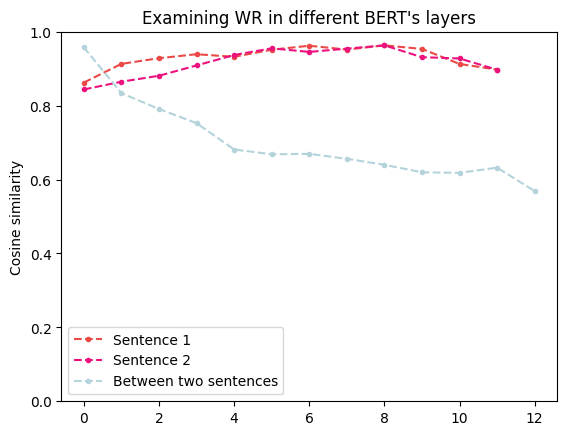

In [66]:
## WRITE YOUR CODE HERE!

def get_tokens_in_hidden_states(sentence):
  # input the BERT model
  sentence_encodings = tokenizer(sentence, return_tensors='pt')
  output = model(**sentence_encodings)

  hidden_states = output.hidden_states
  token_ids = sentence_encodings['input_ids'][0]

  return token_ids, hidden_states

def get_word_embeddings(word, sentence):
  word_id = tokenizer.convert_tokens_to_ids(word)

  token_ids, hidden_states = get_tokens_in_hidden_states(sentence)

  locations_of_word = []
  for i, token_id in enumerate(token_ids):
    if token_id == word_id:
      locations_of_word.append(i)

  word_embeddings_by_layer = []
  for layer_output in hidden_states:
    word_embeddings_for_layer = []
    for i in locations_of_word:
      word_embedding = layer_output[0, i, :]
      word_embeddings_for_layer.append(word_embedding)

    word_embeddings_for_layer = torch.stack(word_embeddings_for_layer)
    word_embeddings_by_layer.append(word_embeddings_for_layer)

  word_embeddings = torch.stack(word_embeddings_by_layer, dim=0)
  return word_embeddings

def cosine_similarity(v1: torch.Tensor, v2: torch.Tensor) -> float:
  from torch.nn.functional import cosine_similarity
  return cosine_similarity(v1, v2).mean().item()

def plot_similarities(similarities):
  fig, ax = plt.subplots()

  def random_color_generator():
    import random
    return f"#{random.randint(0, 0xFFFFFF):06x}"

  for state in similarities.keys():
    vec = similarities[state]
    ax.plot(range(len(vec)), vec, marker = ".", color=random_color_generator(), linestyle='--', label=state)

  ax.set_ylim(0, 1)
  ax.set_ylabel("Cosine similarity")
  ax.set_title("Examining WR in different BERT's layers")
  ax.legend()
  plt.show()

def analyze_word_embeddings(word, sentences: list[str]):
  embeddings = {}
  similarities = {}

  for i in range(len(sentences)):
    embeddings[sentences[i]] = get_word_embeddings(word, sentences[i])

    key = "Sentence " + str(i+1)

    similarities[key] = []
    for _, (we1, we2) in enumerate(zip(embeddings[sentences[i]][:-1], embeddings[sentences[i]][1:])):
      similarities[key].append(cosine_similarity(we1, we2))

  similarities["Between two sentences"] = []
  for layer_idx, (we1, we2) in enumerate(zip(embeddings[sentences[0]], embeddings[sentences[1]])):
    similarities["Between two sentences"].append(cosine_similarity(we1, we2))

  plot_similarities(similarities)

sentences = ["The bat flew swiftly through the air.",
             "He grabbed his bat and headed to the baseball field."]

analyze_word_embeddings("bat", sentences)

Do the same for **charge** provided sentences.

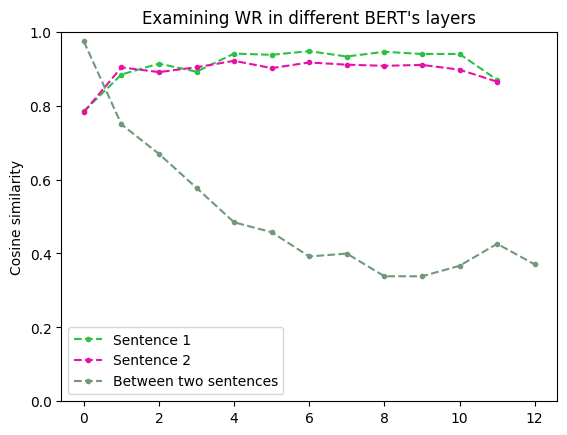

In [50]:
## WRITE YOUR CODE HERE!

sentences = ["I need to charge my phone before leaving.",
             "He was arrested for charge of theft."]

analyze_word_embeddings("charge", sentences)

Analysis the results and how `BERT` captures the contextual meaning of words.:

> We have two different type of plots:
> 
> 1. **Similarity of word embeddings in consecutive layers in one sentence**:
> As you can see, in such plots, the similarity socres are high on average, but the plot is increasing. As we know, these two words ("bat" and "charge") have different meanings, and the exact one, is understood based on the context. So in early layers, the word embeddings are not precise and are an average of all meanings. As we move on to the later layers, more information and context is added and model understands the exact meaning better. So the rate of increase is decreasing, because each layer BERT captures the contextual meaning more and more until it determines it and reaches the correct one. Also the plots indicate that, the different between word embeddings on two cntinous layers is not that much high.
> 
> 1. **Similarity of word embeddings in two different sentences as we move from early layers to the later layers**: One the other hand, the similarity between embeddings of "bat" and "charge" are decreasing. In early layers, it is higher and it reduces as we move on layer by layer. As we know, the words in two sentences have quite different meaning. In first layer, the embeddings are the same, beacuase BERT models is only focusing on the meaning, regardless of the context. But, as we move to the later layers, BERT model capture more information about it and updates it based on the other words and generally, the context of the sentence. So the embeddings begin to become different.

### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [67]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [97]:
## WRITE YOUR CODE HERE!

def mask_token(sentence, to_mask):
  sentence_encodings = tokenizer(sentence, return_tensors='pt')
  token_ids = sentence_encodings['input_ids']

  tokens_to_mask = tokenizer.tokenize(to_mask)

  first_token_to_mask_id = tokenizer.convert_tokens_to_ids(tokens_to_mask[0])

  first_masked_token_location = torch.where(token_ids == first_token_to_mask_id)[1]
  last_masked_token_location = first_masked_token_location + len(tokens_to_mask)

  token_ids[0, first_masked_token_location:last_masked_token_location] = tokenizer.mask_token_id
  masked_sentence = tokenizer.decode(token_ids[0])

  logits = model(token_ids).logits

  return masked_sentence, first_masked_token_location, last_masked_token_location, logits

def get_topk_choices_of_BERT(logits, first_masked_token, last_masked_token):
  topk_token_strings_for_all_masked_tokens = []
  for i in range(first_masked_token, last_masked_token):
    topk_token_ids_for_current_masked_token = torch.topk(logits[0, i], 5).indices

    topk_token_strings_for_current_masked_token = []
    for token_id in topk_token_ids_for_current_masked_token:
      token_string = tokenizer.decode([token_id])
      topk_token_strings_for_current_masked_token.append(token_string)
    topk_token_strings_for_all_masked_tokens.append(topk_token_strings_for_current_masked_token)

  return topk_token_strings_for_all_masked_tokens

sentences_and_str_to_mask = [
    ("William Shakespeare, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.", "William Shakespeare"),
    ("The Amazon Rainforest, spanning across nine countries in South America, is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.", "South America"),
    ("The Statue of Liberty, a gift from France to the United States, was dedicated on October 28, 1886. Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity.", "France")
]

for sentence, to_mask in sentences_and_str_to_mask:
    masked_sentence, first_masked_token, last_masked_token, logits = mask_token(sentence, to_mask)
    topk_token_strings_for_all_masked_tokens = get_topk_choices_of_BERT(logits, first_masked_token, last_masked_token)

    print("Sentence:", masked_sentence)
    print("Masked string:", to_mask)
    print("Top 5 choices of BERT for the mask tokens:")
    for i in range(len(topk_token_strings_for_all_masked_tokens)):
      print(" - For token " + str(i+1) + ":")
      for j in range(len(topk_token_strings_for_all_masked_tokens[i])):
        print("  + [" + str(j+1) + "] " + topk_token_strings_for_all_masked_tokens[i][j])
    print()

Sentence: [CLS] [MASK] [MASK], widely regarded as the greatest writer in the english language, was born in stratford - upon - avon, england, in 1564. [SEP]
Masked string: William Shakespeare
Top 5 choices of BERT for the mask tokens:
 - For token 1:
  + [1] thomas
  + [2] william
  + [3] edmund
  + [4] samuel
  + [5] henry
 - For token 2:
  + [1] shakespeare
  + [2] scott
  + [3] johnson
  + [4] shelley
  + [5] moore

Sentence: [CLS] the amazon rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on earth, covering an area of over 6. 7 million square kilometers ( 2. 7 million square miles ) and harboring unparalleled biodiversity. [SEP]
Masked string: South America
Top 5 choices of BERT for the mask tokens:
 - For token 1:
  + [1] the
  + [2] africa
  + [3] asia
  + [4] global
  + [5] modern
 - For token 2:
  + [1] africa
  + [2] world
  + [3] asia
  + [4] brazil
  + [5] amazon

Sentence: [CLS] the statue of liberty, a gift from [MASK] to the 

Analyze the results and how masked language modeling works.

> In this part, we've observed how BERT, as an instance of masked language models (MLMs), excels in contextual word prediction. Not the exact word, but a string with very similat meaning. As you can see the top k combination of predicted tokens by the model, is a very proper and meaningful alternative for the masked tokens.
>
> By replacing a certain percentage of tokens in the input text with a [MASK] token and training the model to predict these masked tokens based on surrounding context, BERT learns to understand the relationships between words in a sentence. As a result, BERT can effectively fill in the blanks with appropriate words that fit the context, demonstrating its ability to capture nuanced linguistic patterns and meanings.